# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
df_merged = df_offers.merge(df_transactions, how='left', on='offer_id')
df_merged.head(20)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [5]:
df_merged.shape

(324, 9)

In [6]:
pivot = df_merged.pivot_table(index=['customer_name'], values=['n'], columns=['offer_id'], fill_value=0)
pivot

n                             ...                              
offer_id      1  2  3  4  5  6  7  8  9  10  ... 23 24 25 26 27 28 29 30 31 32
customer_name                                ...                              
Adams          0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Allen          0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  1  0  0  0  0  0
Anderson       0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bailey         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Baker          0  0  0  0  0  0  1  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Barnes         0  0  0  0  0  0  0  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Bell           0  1  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bennett        0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  1  0  0  0
Brooks         0  0  1  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
Brown          0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Butler         1  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  1  0  0
Campbell       0  1  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Carter         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Clark          0  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  0  1  0
Collins        0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Cook           0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Cooper         0  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1
Cox            0  1  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Cruz           0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Davis          0  0  0  0  0  0  0  0  0  0  ...  0  0  1  0  0  0  0  0  0  0
Diaz           0  0  0  0  0  0  1  1  0  0  ...  0  0  0  0  0  0  1  1  0  0
Edwards        0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  1  0  0  0  0  0
Evans          0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  1  0  0  0  0  0
Fisher         1  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  1  1  0
Flores         0  0  0  0  0  0  0  0  0  0  ...  0  1  0  0  0  0  0  0  0  0
Foster         1  0  0  0  0  0  0  0  1  0  ...  1  0  0  0  0  0  0  0  0  0
Garcia         0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Gomez          0  0  0  0  0  0  0  0  0  0  ...  0  0  1  0  0  0  0  0  0  1
Gonzalez       0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  0  0  0  0  1  0
Gray           0  0  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
...           .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
Reed           0  0  0  0  1  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Reyes          0  0  0  0  0  0  0  0  1  0  ...  1  0  0  0  0  0  0  0  0  0
Richardson     0  0  1  0  0  1  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Rivera         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Roberts        0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0
Robinson       0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  1  0  0  0
Rodriguez      0  1  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
Rogers         0  0  1  0  0  0  1  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
Ross           0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Russell        0  0  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
Sanchez        0  0  0  1  1  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
Sanders        1  0  0  1  1  1  0  0  1  0  ...  0  0  1  1  0  0  0  0  0  0
Scott          0  0  0  0  0  1  0  0  0  0  ...  1  0  0  0  0  0  0  0  0  0
Smith          0  1  0  0  0  0  0  0  0  0  ...  0  1  0  0  0  0  0  0  0  0
Stewart        0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  1  1  0  0
Sullivan       0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
Taylor         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  

## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

### What values of 𝑆𝑆 do you believe represent better clusterings? Why?

__A:__ The optimal value of SS is not the minimum but the value where the rate of change drops significantly. This gives the best clustering without overfitting and having each data point in its own cluster - which would be the solution if we took the minimum SS.

In [7]:
x_cols = pivot.to_numpy()
x_cols.shape

(100, 32)

#### First let's plot K up to the number of features just to see what the curve looks like. 

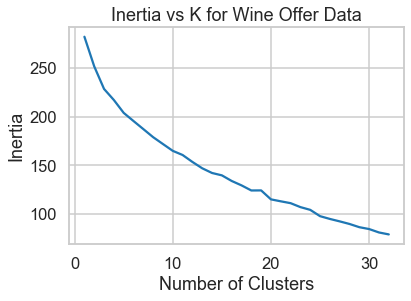

In [8]:
from sklearn.cluster import KMeans

ss = []
for K in range(1,x_cols.shape[1]+1):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

K = range(1, x_cols.shape[1]+1)
plt.plot(K, ss)
plt.title("Inertia vs K for Wine Offer Data")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### Now look more closely at the range 1-10 as it seems the rate of change drops somewhere around 3 and 5. 

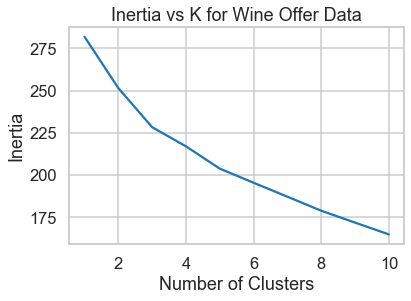

In [9]:
from sklearn.cluster import KMeans

ss = []
for K in range(1,11):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

K = range(1, 11)
plt.plot(K, ss)
plt.title("Inertia vs K for Wine Offer Data")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### There is a change in rate at 3 and again at 5. These changes are small and there is no clear knee or elbow in this curve. Let's pick 5 to get the lower inertia value and see how that goes. 

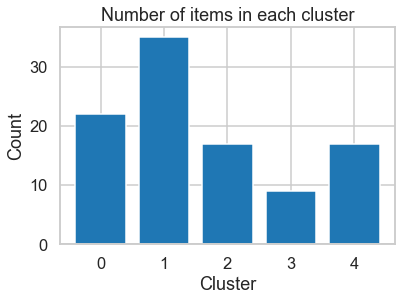

In [10]:
from collections import Counter

N=5
kmeans = KMeans(n_clusters=N, random_state=42)
kmeans.fit_predict(x_cols)
labels = kmeans.labels_

cluster_counts = Counter(labels)
cluster_counts_sorted = sorted(cluster_counts.items())
bar_pos = [i[0] for i in cluster_counts_sorted]
bar_counts = [i[1] for i in cluster_counts_sorted]

plt.bar(bar_pos, bar_counts, align='center')
plt.title("Number of items in each cluster")
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

### What challenges did you experience using the Elbow method to pick 𝐾? 
__A:__  There is no clear elbow, just a gentle curve with several subtle changes in slope of the plot of SS vs K.

---

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

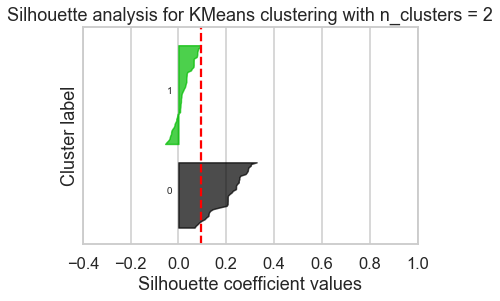

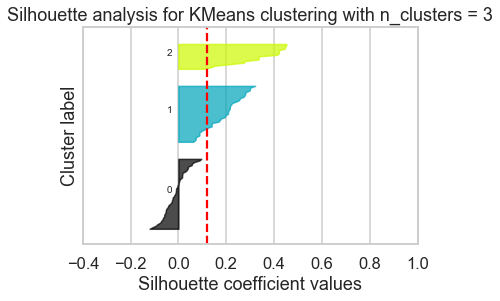

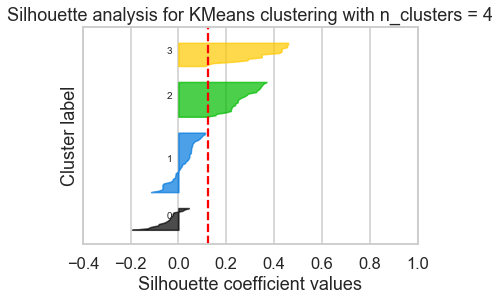

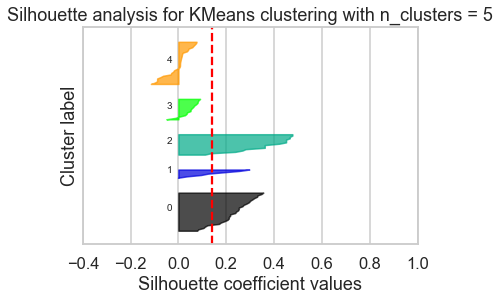

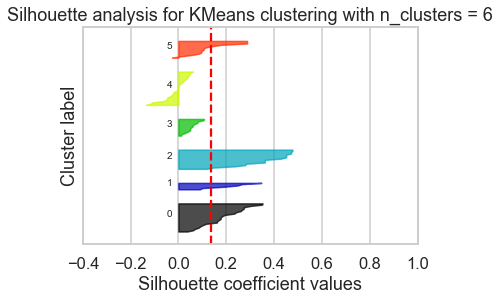

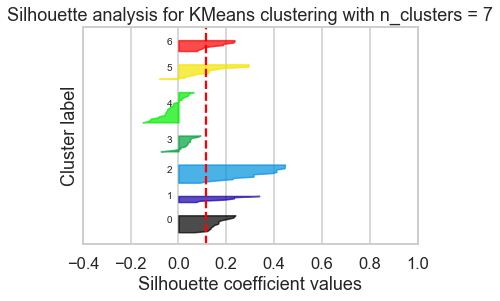

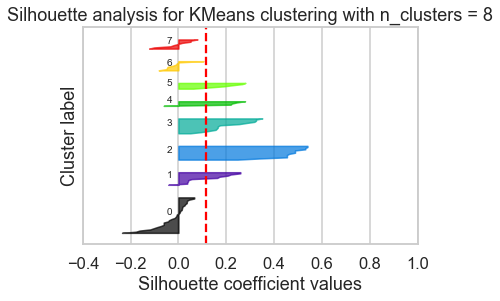

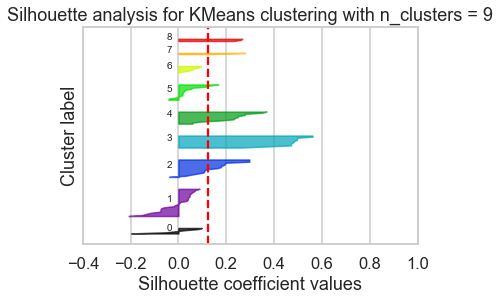

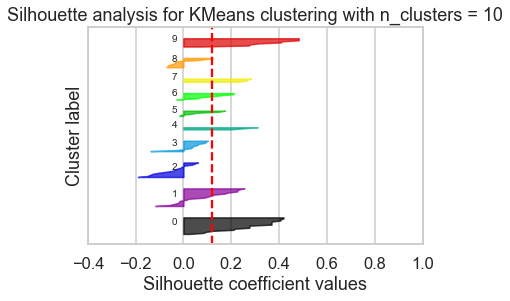

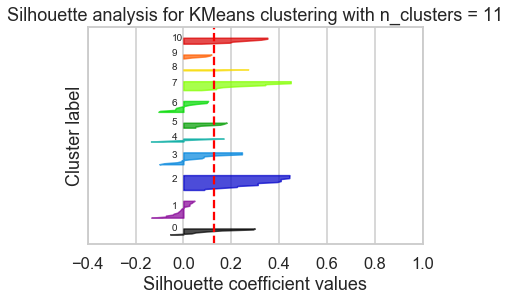

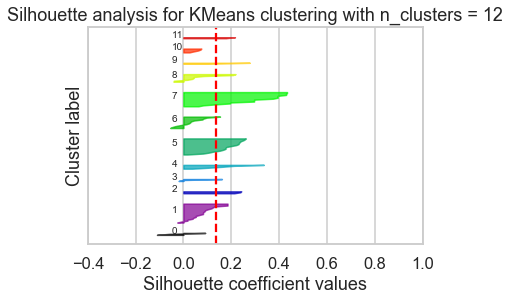

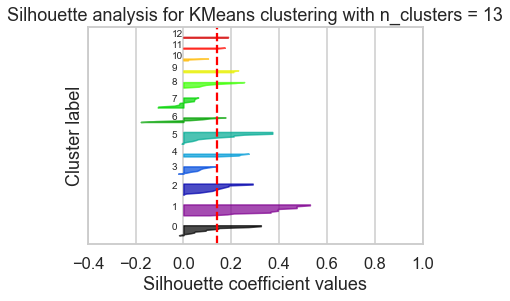

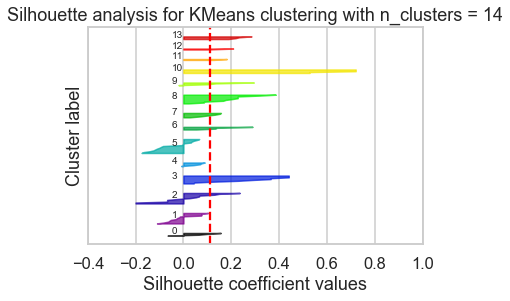

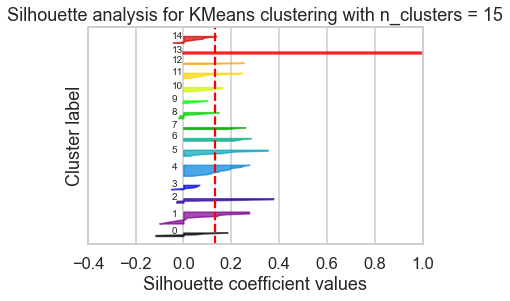

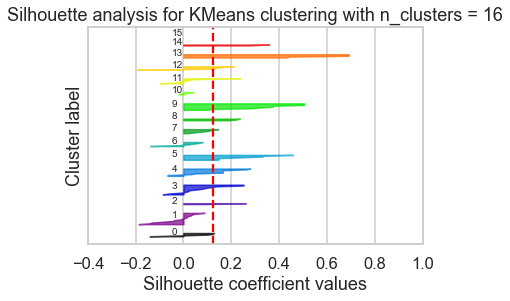

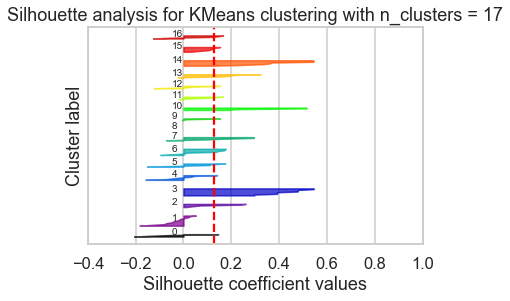

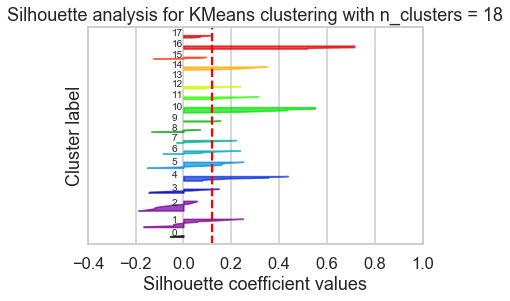

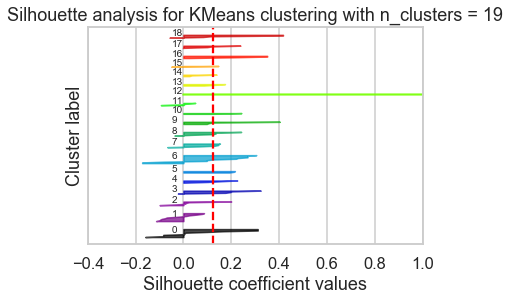

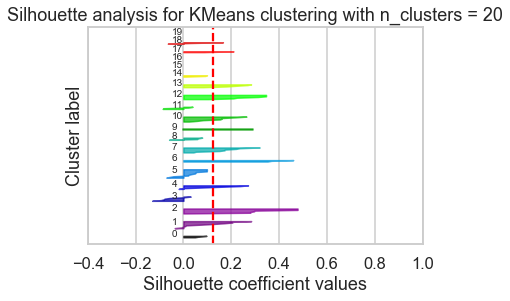

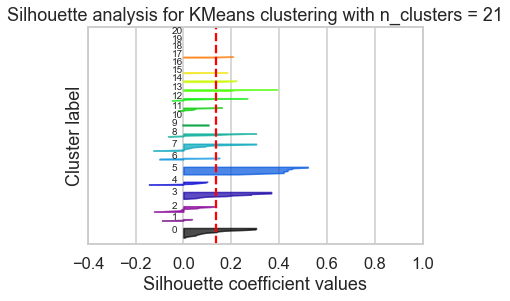

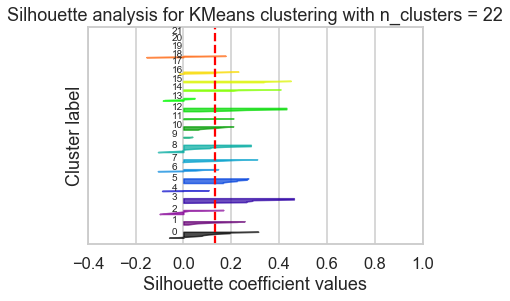

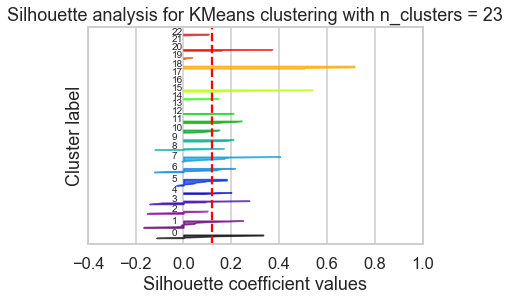

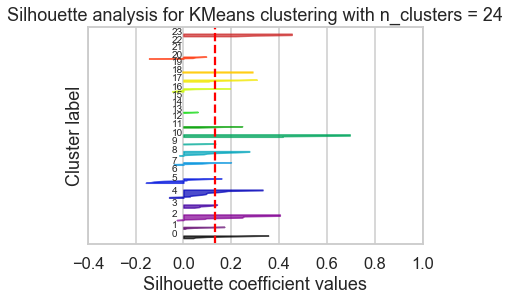

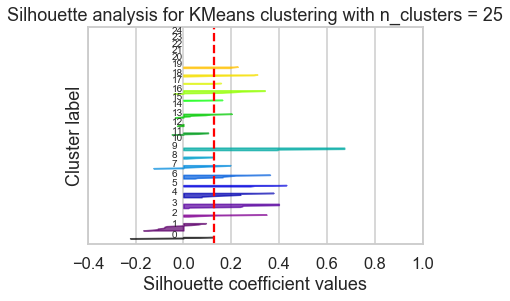

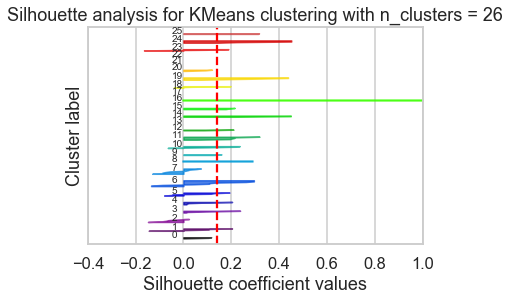

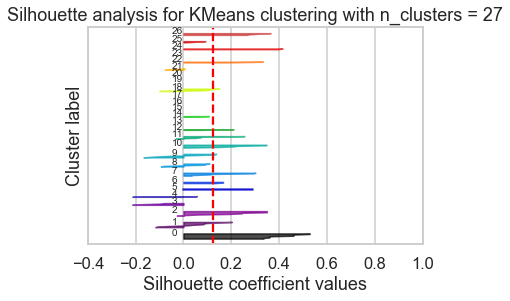

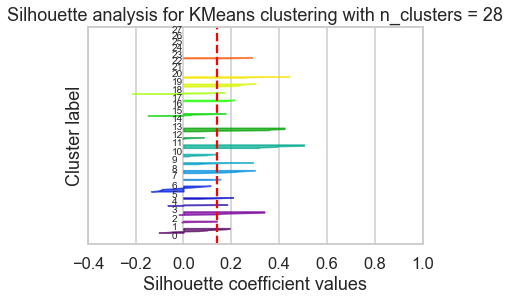

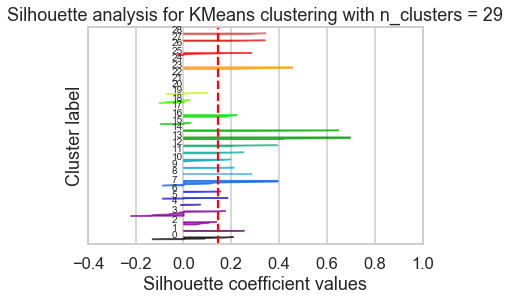

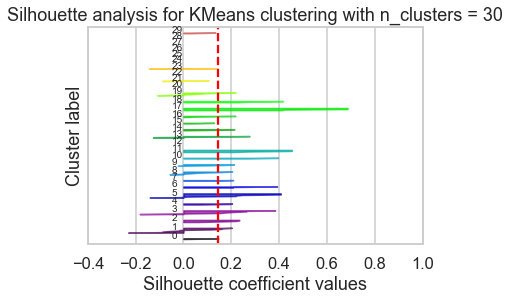

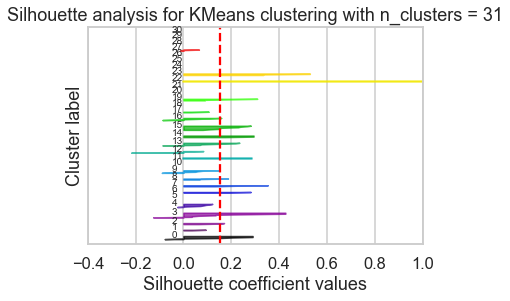

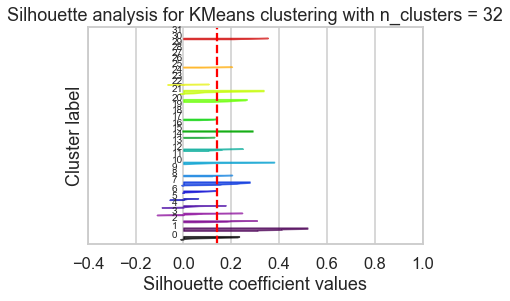

In [11]:
# Code adapted from scikit-learn documentation example.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

silhouette_avg_all = []

# Get rid of warning of over 20 plots open
plt.rcParams.update({'figure.max_open_warning': 0})

range_n_clusters = range(2,x_cols.shape[1]+1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-.4, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(x_cols) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = (silhouette_score(x_cols, cluster_labels))
    silhouette_avg_all.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters)
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

  
plt.show()

Now plot average Silhouette Score for each value of K. 

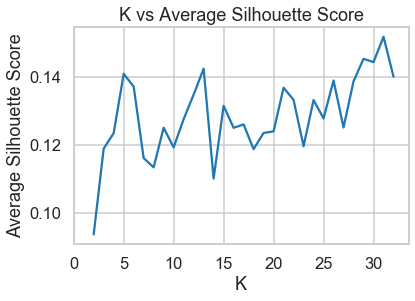

In [12]:
xs = range_n_clusters
ys = silhouette_avg_all

plt.plot(xs, ys)
plt.title('K vs Average Silhouette Score')
plt.xlabel('K')
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.ylabel('Average Silhouette Score')
plt.show()

### What 𝐾 does the plot suggest we should choose? Does it differ from what we found using the Elbow method?
__A:__ This plot shows a local peak at K=5, but the value of the Silhouette Score indicates that no substantial structure has been found.  

The highest score is from K=31 clusters. Unfortunately, the value of the Silhouette Score at K=31 also indicates no substantial structure has been found. Also, this is one less cluster than number of features in our input array so this is clearly an overfit solution.  

There is another intermediate peak at K=13, but again, the Silhouette Score shows no substantial structure.  

Values near zero indicate overlapping clusters. The Silhouette Scores calculated are all pretty close to zero so there is most likely overlap.   

---

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

First create the PCA features. Then try K=5 first as it looked best from the Sum of Squares plot and had a local peak on the Silhouette vs K plot. 

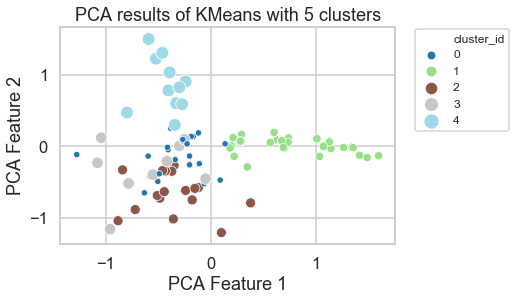

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# First calculate top two PCA features. 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_cols)
x = pca_features[:,0]
y = pca_features[:,1]

K=5


def plot_pca_kmeans(K, X, pivot, x, y):
    """
    Plot a scatter plot of the two PCA features of the Wine Offer data with K cluster labels. 
    
    Input: K(int):       number of clusters for KMeans algorithm
           X(ndarray):   Numpy array of KMeans input data in shape (n_samples, n_features)
           pivot(df):    Pandas pivot table with index = customer_name
           x(ndarray):   Numpy array of first PCA feature in shape (n_samples,)
           y(ndarray):   Numpy array of second PCA feature in shape (n_samples,)
    
    Output: Scatterplot of PCA features with color identifying cluster label
            Dataframe with customer name, cluster labels, PCA features
    """
    kmeans = KMeans(n_clusters=K, random_state=42)
    cl_labels = kmeans.fit_predict(X)
    df_pca_features = pd.DataFrame({'customer_name':pivot.index.values, 'cluster_id':cl_labels, 'pca_1':x, 'pca_2':y})
    # labels is array of cluster labels from KMeans clustering with n_clusters=5
    sns.scatterplot(x='pca_1', y='pca_2', hue='cluster_id', size='cluster_id', data=df_pca_features, palette='tab20', 
                    legend='full')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title('PCA results of KMeans with ' + str(K) + ' clusters')
    plt.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large')
    plt.show()
    return(df_pca_features)
    
df_pca_5 = plot_pca_kmeans(K, x_cols, pivot, x, y)

The clusters appear to overlap a fair amount. This is not surprising given the Silhouette Score was close to 0 at 0.14 and the Silhouette analysis chart for K=5 clusters showed two clusters with negative values. Cluster 0 and cluster 3 seem to be in the same space and cluster 2 encroaches into that space as well. Let's try K=13 as it was another local peak on the Silhouette Score vs K plot. 

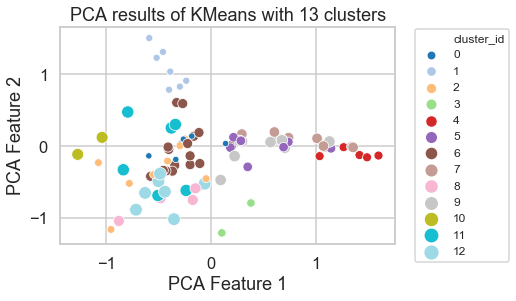

In [14]:
K=13
df_pca_13 = plot_pca_kmeans(K, x_cols, pivot, x, y)

Things are no better as there is still significant overlap even though the clusters are smaller. This is not surprising as the Silhouette analysis chart for K=13 shows four clusters with negative values. Let's try K=31 as it was the peak on the Silhouette Score vs K plot. 

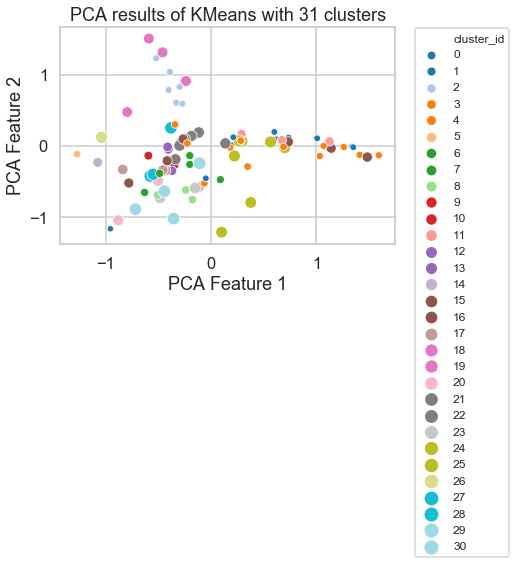

In [15]:
K=31
df_pca_31 = plot_pca_kmeans(K, x_cols, pivot, x, y)

This is clearly a mess despite the best Silhouette Score and many small clusters. There is still significant overlap. Again, not surprising with at least seven clusters having negative values on the Silhouette analysis chart. Let's try K=3 as it was the first bend in the Sum of Squares plot. 

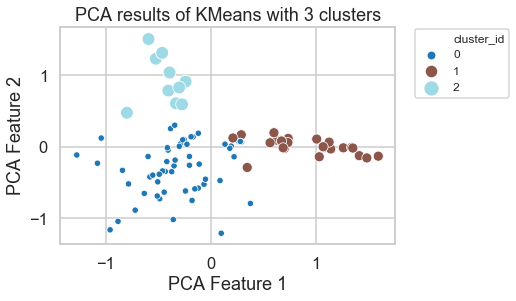

In [16]:
K=3
df_pca_3 = plot_pca_kmeans(K, x_cols, pivot, x, y)

This is the best looking plot of PCA features by cluster. There appear to be reasonable decision boundaries with the least amount of overlap compared to the previous plots. The Silhouette Score is slightly lower than that for K=5. The Silhouette analysis chart shows negative values for one cluster - but all the charts show negative values for one or more cluster(s). Still, the PCA visualization for K=3 looks the best. 

### Based on what you see, what seems to be the best value for 𝐾? Moreover, which method of choosing 𝐾 seems to have produced the optimal result visually? 
__A:__ The PCA plot with 3 clusters looks the best as there is the least overlap. It appears there could be good decision boundaries between clusters. That said, the clusters are not tight so it is clear they are not optimal.  

There are small changes in slope on the Sum of Squares curve at K=3 and K=5 although neither is clearly an "elbow" or "knee". The Sum of Squares curve did not yield a quick, obvious answer to the best value of K but did give some guidance.  

The Silhouette Score at K=3 is poor and there is no indication on the Average Silhouette Score vs K curve that 3 is a good value. There are no good Silhouette Scores at any number of clusters as they all indicate no substantial structure was found and overlapping clusters. None of peaks on the Average Silhouette Score plot yielded good separation on the PCA plots.         

The Sum of Squares results combined with visualizing results via the PCA plot is the only mechanism that gives any confidence in a particular value of K with 3 clearly being the best. 

### Exercise: Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?

In [17]:
df_cluster_merged = df_merged.merge(df_pca_3, on='customer_name')

In [18]:
df_cluster_merged.columns

Index(['offer_id', 'campaign', 'varietal', 'min_qty', 'discount', 'origin',
       'past_peak', 'customer_name', 'n', 'cluster_id', 'pca_1', 'pca_2'],
      dtype='object')

In [19]:
df_cluster_merged.shape
mon_type = pd.CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                                           'September', 'October', 'November', 'December'], ordered=True)
df_cluster_merged['campaign'] = df_cluster_merged['campaign'].astype(mon_type)

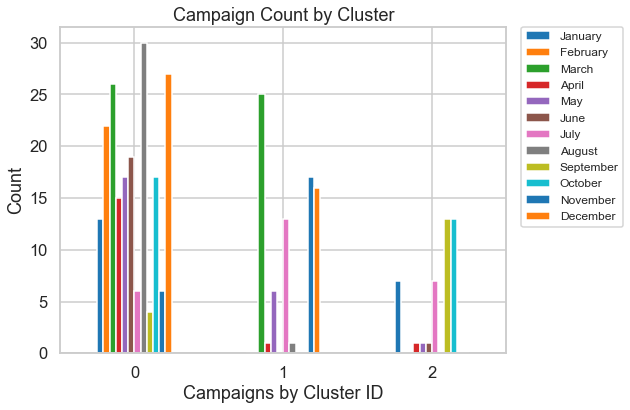

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
pd.crosstab(df_cluster_merged.cluster_id, df_cluster_merged.campaign).plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Campaigns by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Campaign Count by Cluster')
plt.show()

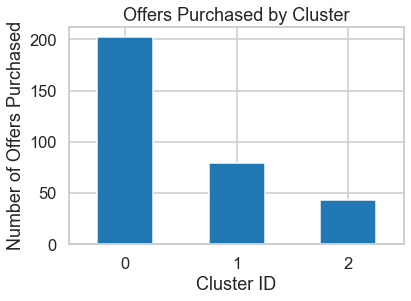

In [21]:
df_cluster_merged.groupby(['n', 'cluster_id'])['n'].count().plot(kind='bar')
plt.xlabel('Cluster ID')
plt.xticks([0, 1, 2], ('0', '1', '2'), rotation=0)
plt.ylabel('Number of Offers Purchased')
plt.title('Offers Purchased by Cluster')
plt.show()

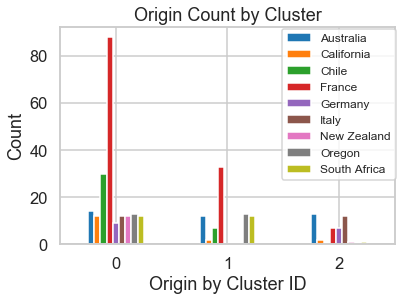

In [22]:
ax = pd.crosstab(df_cluster_merged.cluster_id, df_cluster_merged.origin).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Origin by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Origin Count by Cluster')
plt.show()

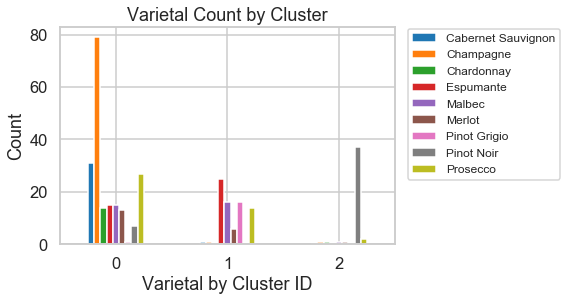

In [23]:
ax = pd.crosstab(df_cluster_merged.cluster_id, df_cluster_merged.varietal).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Varietal by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Varietal Count by Cluster')
plt.show()

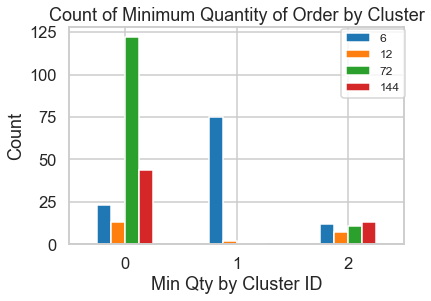

In [24]:
ax = pd.crosstab(df_cluster_merged.cluster_id, df_cluster_merged.min_qty).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Min Qty by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Minimum Quantity of Order by Cluster')
plt.show()

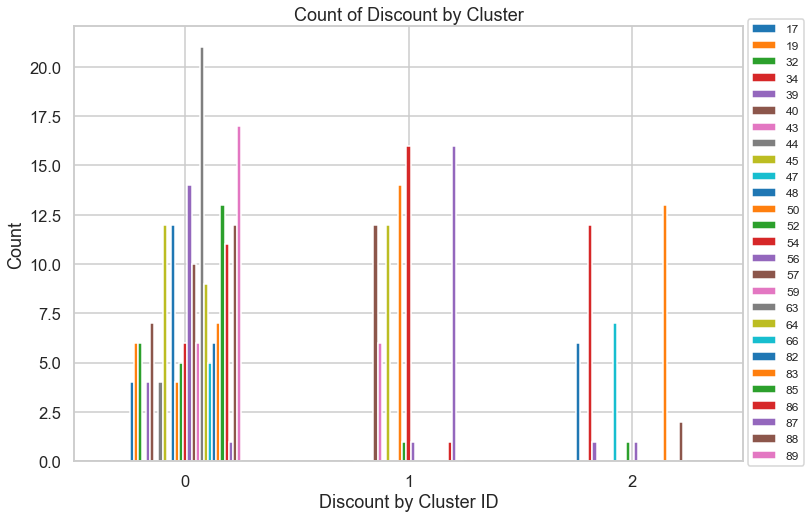

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
pd.crosstab(df_cluster_merged.cluster_id, df_cluster_merged.discount).plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.03), fontsize='large')
plt.xlabel('Discount by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Discount by Cluster')
plt.show()

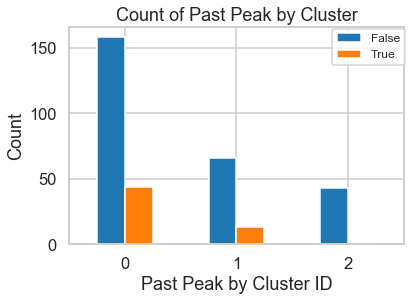

In [26]:
ax = pd.crosstab(df_cluster_merged.cluster_id, df_cluster_merged.past_peak).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Past Peak by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Past Peak by Cluster')
plt.show()

### Cluster Story:
Cluster 0 has over twice as many purchases as cluster 1 and over four times as many as cluster 2. It is the only cluster to contain campaigns from every month of the year and wines from every origin. It also contains most of the large minimum quantity offers (72 and 144). Cluster 0 contains nearly all the Cabernet Sauvignon, Champagne and Chardonnay.   

Cluster 1 has almost all the Pinot Grigiot but also has a hodgepodge of other varieties that are also in Cluster 0. Cluster 1 is almost all offers with a minimum quantity of 6. It also has all of the "43" discounts.   

Cluster 2 contains most of the Pinot Noir and is almost exclusively Pinot Noir. Cluster 2 is the only one to contain NO past peak wines, but it is also the smallest in terms of number of purchases. It also contains all of the "34" and "47" discounts.   


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

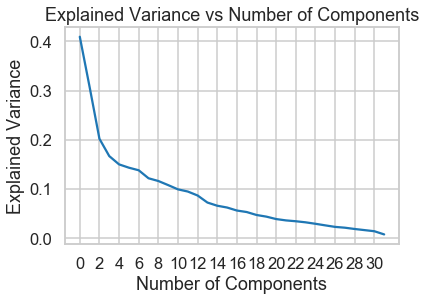

In [27]:
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

var = pca.explained_variance_
n_components = pca.explained_variance_.shape[0]
xv=np.arange(n_components)
plt.plot(xv, var)
plt.title('Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
plt.show()

### Exercise: Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?  

__A:__ The curve bends sharply at n_components = 2 and the descent slows quickly. It seems 2 components was a very good choice. 

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


__Affinity propogation__

In [28]:
from sklearn.cluster import AffinityPropagation
aff_prop = AffinityPropagation()
labels = aff_prop.fit_predict(x_cols)
aff_prop.n_iter_

47

In [29]:
def plot_pca_generic_clusters(labels, tag, pivot, x, y):
    """
    Plot a scatter plot of the two PCA features of the Wine Offer data with K cluster labels. 
    
    Input: labels(ndarray):  Numpy array of cluster labels from clustering algorithm
           tag(str):         Tag to print in plot title to identify clustering algorithm
           pivot(df):        Pandas pivot table with index = customer_name
           x(ndarray):       Numpy array of first PCA feature in shape (n_samples,)
           y(ndarray):       Numpy array of second PCA feature in shape (n_samples,)
    
    Output: Scatterplot of PCA features with color identifying cluster label
    """
    df_pca_features = pd.DataFrame({'customer_name':pivot.index.values, 'cluster_id':labels, 'pca_1':x, 'pca_2':y})
    sns.scatterplot(x='pca_1', y='pca_2', hue='cluster_id', size='cluster_id', data=df_pca_features, palette='tab20', 
                    legend='full')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title('PCA results with ' + tag + ' Clustering')
    plt.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large')
    plt.show()

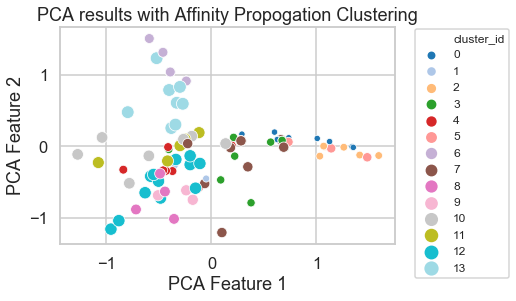

In [30]:
plot_pca_generic_clusters(labels, 'Affinity Propogation', pivot, x, y)

In [31]:
silhouette_avg = (silhouette_score(x_cols, labels))
print('Silhouette Score = ', silhouette_avg)

Silhouette Score =  0.12346523604478911


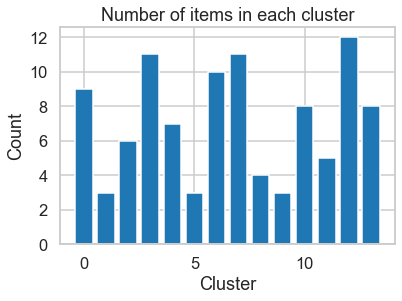

In [32]:
from collections import Counter

cluster_counts = Counter(labels)
cluster_counts_sorted = sorted(cluster_counts.items())
bar_pos = [i[0] for i in cluster_counts_sorted]
bar_counts = [i[1] for i in cluster_counts_sorted]

plt.bar(bar_pos, bar_counts, align='center')
plt.title("Number of items in each cluster")
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.yticks([0, 2, 4, 6, 8, 10, 12])
plt.show()

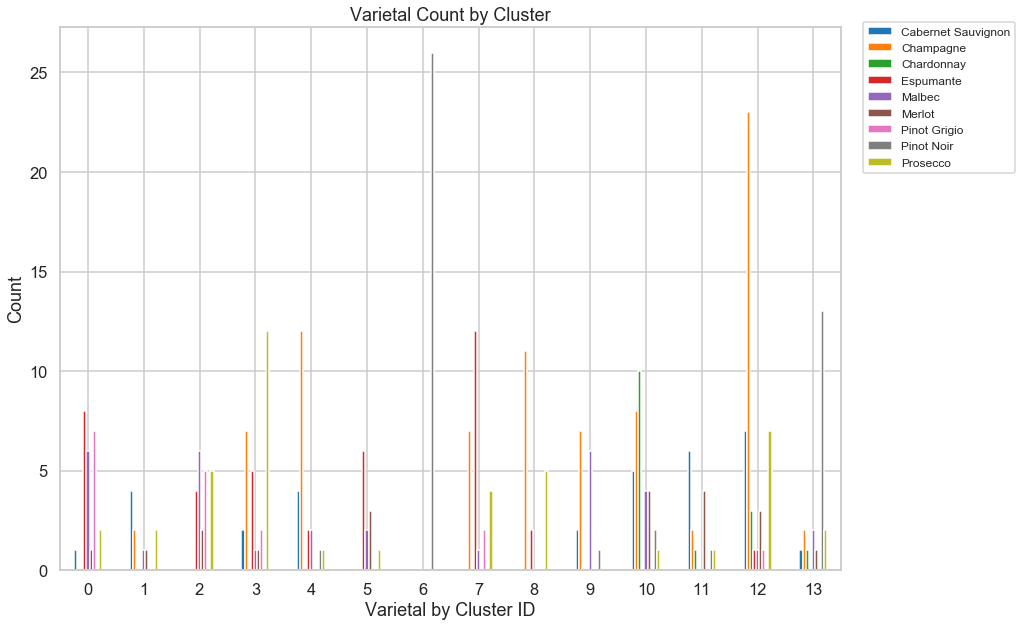

In [33]:
fig, ax = plt.subplots(figsize=(14, 10))
df_aff_features = pd.DataFrame({'customer_name':pivot.index.values, 'cluster_id':labels, 'pca_1':x, 'pca_2':y})
df_aff_merged = df_merged.merge(df_aff_features, on='customer_name')
pd.crosstab(df_aff_merged.cluster_id, df_aff_merged.varietal).plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Varietal by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Varietal Count by Cluster')
plt.show()

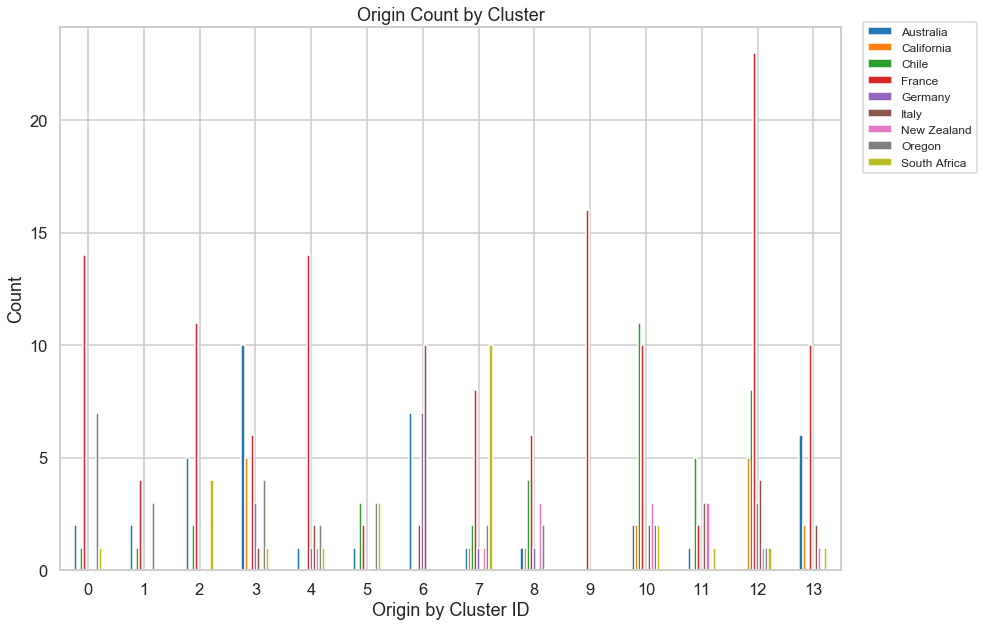

In [34]:
fig, ax = plt.subplots(figsize=(14, 10))
ax = pd.crosstab(df_aff_merged.cluster_id, df_aff_merged.origin).plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Origin by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Origin Count by Cluster')
plt.show()

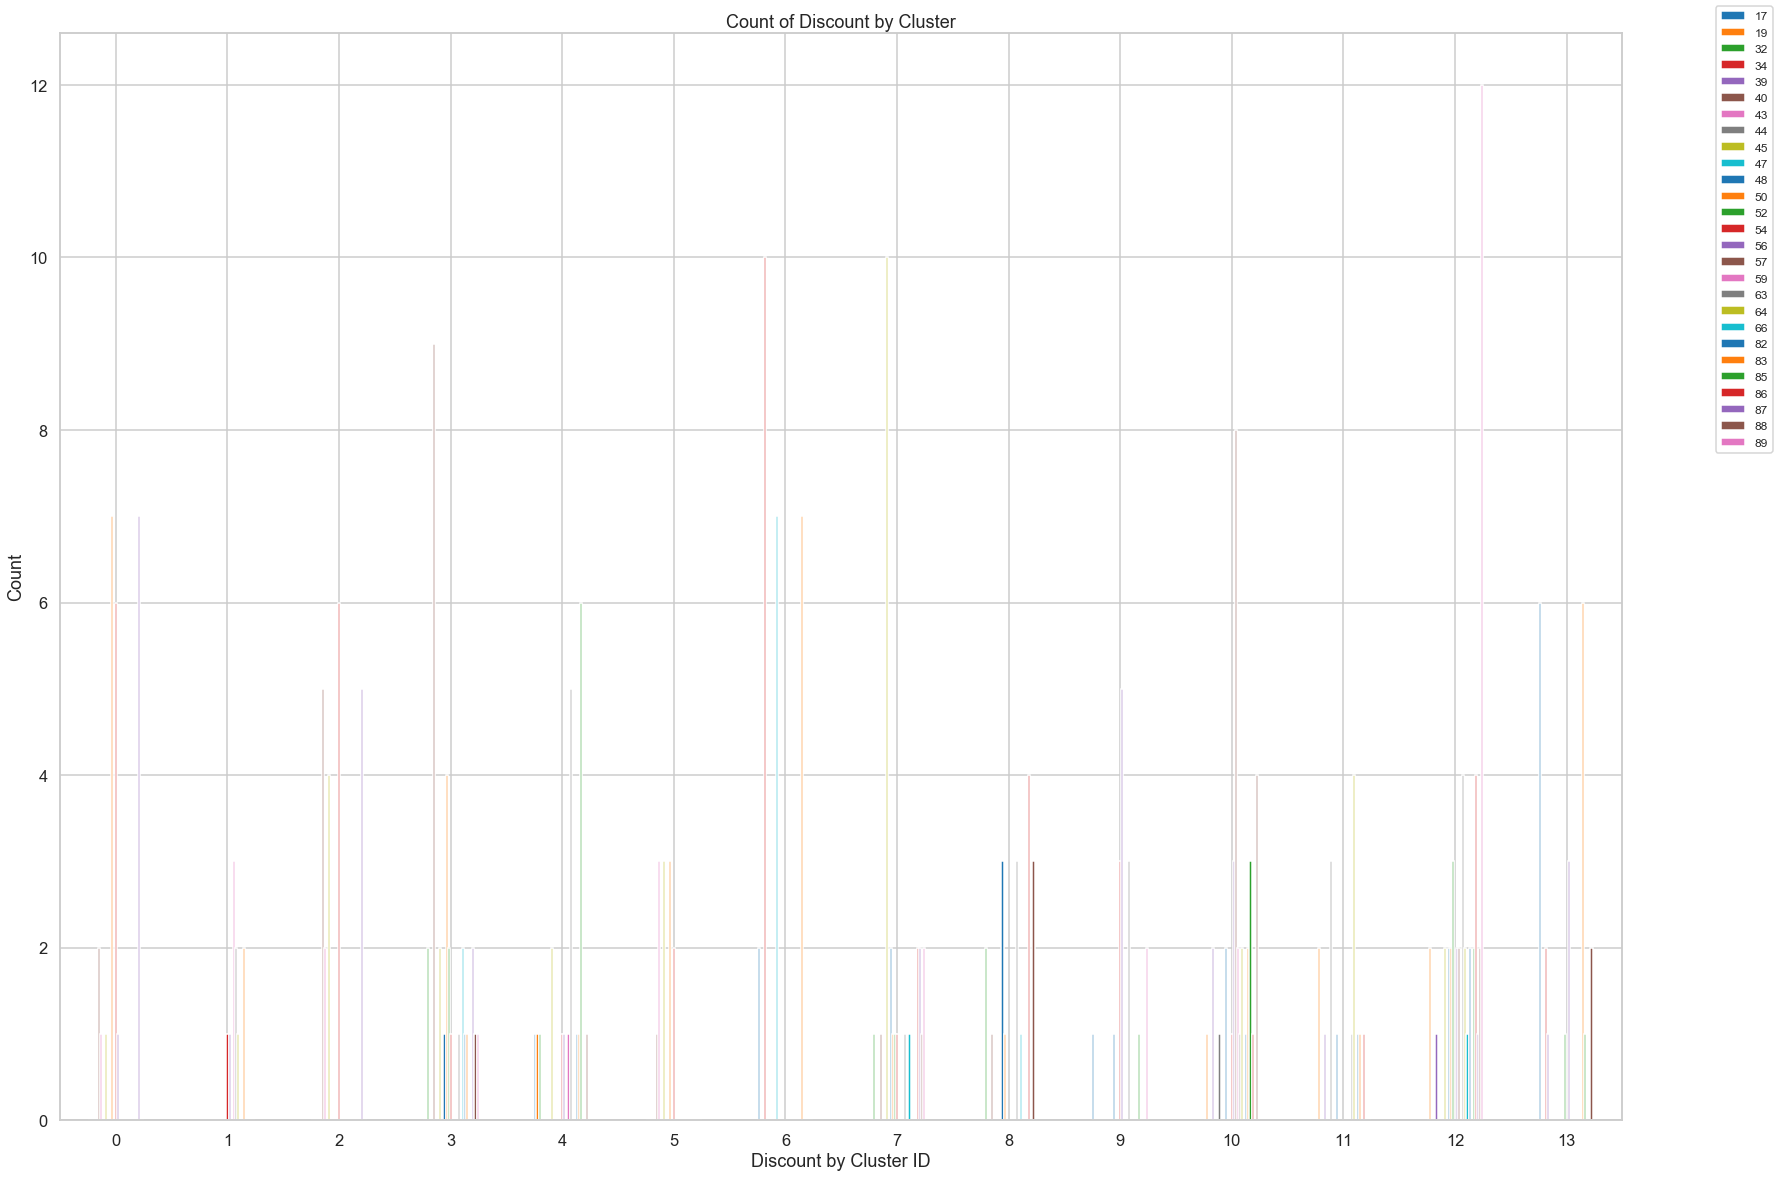

In [35]:
fig, ax = plt.subplots(figsize=(28, 20))
pd.crosstab(df_aff_merged.cluster_id, df_aff_merged.discount).plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.03), fontsize='large')
plt.xlabel('Discount by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Discount by Cluster')
plt.show()

Affinity propogation chose 14 clusters which is very near the 13 that was a local peak on the KMeans Silhouette Score plot. Even though the number of clusters are close the results are different per the PCA plots.  

This result yields a large number of clusters (14) for a relatively small number of data points (100). This yields fairly small clusters and they have a lot of overlap.  

While the Silhouette Scores are close, the KMeans with K=3 appears to have better defined clusters per the PCA cluster visualization plot than the Affinity propogation clustering. The Affinity propogation clustering doesn't seem to add any useful segmentation to the original data - at least with the features plotted above. 

__Spectral clustering__

In [36]:
from sklearn.cluster import SpectralClustering
spec_clust = SpectralClustering(random_state=0)
labels = spec_clust.fit_predict(x_cols)

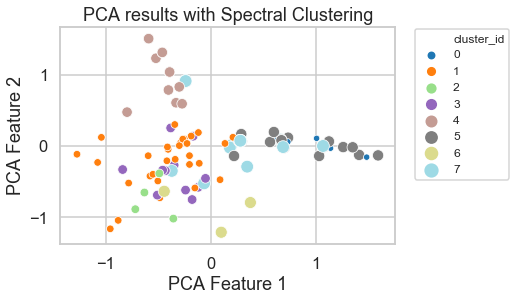

In [37]:
plot_pca_generic_clusters(labels, 'Spectral', pivot, x, y)

In [38]:
silhouette_avg = (silhouette_score(x_cols, labels))
print('Silhouette Score = ', silhouette_avg)

Silhouette Score =  0.08537645903704133


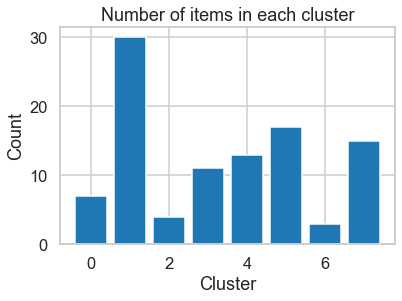

In [39]:
from collections import Counter

cluster_counts = Counter(labels)
cluster_counts_sorted = sorted(cluster_counts.items())
bar_pos = [i[0] for i in cluster_counts_sorted]
bar_counts = [i[1] for i in cluster_counts_sorted]

plt.bar(bar_pos, bar_counts, align='center')
plt.title("Number of items in each cluster")
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

The spectral clustering Silhouette score is even smaller than the affinity propogation score indictating more overlap. The PCA plot supports this.   

This clustering also looks worse than the KMeans with K=3.  

__Agglomerative clustering__

In [40]:
from sklearn.cluster import AgglomerativeClustering
agg_clust = AgglomerativeClustering()
labels = agg_clust.fit_predict(x_cols)

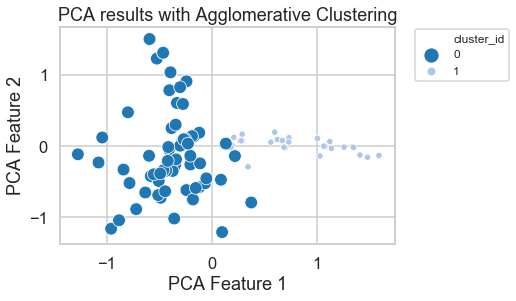

In [41]:
plot_pca_generic_clusters(labels, 'Agglomerative', pivot, x, y)

In [42]:
silhouette_avg = (silhouette_score(x_cols, labels))
print('Silhouette Score = ', silhouette_avg)

Silhouette Score =  0.08258017823184984


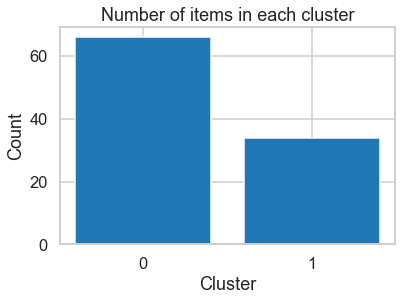

In [43]:
from collections import Counter

cluster_counts = Counter(labels)
cluster_counts_sorted = sorted(cluster_counts.items())
bar_pos = [i[0] for i in cluster_counts_sorted]
bar_counts = [i[1] for i in cluster_counts_sorted]

plt.bar(bar_pos, bar_counts, align='center')
plt.title("Number of items in each cluster")
plt.xlabel('Cluster')
plt.xticks([0, 1])
plt.ylabel('Count')
plt.show()

The agglomerative clustering is as clean as the KMeans in terms of having pretty clean boundries on the PCA plot. Its Silhouette Score is lower than the KMeans clustering however, so there could be a bit more overlap than meets the eye. It would be interesting to explore the original data in these two clusters. 

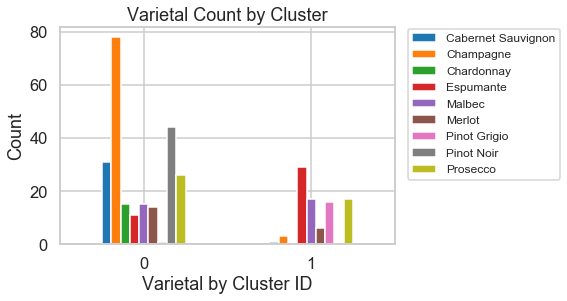

In [44]:
df_agg_features = pd.DataFrame({'customer_name':pivot.index.values, 'cluster_id':labels, 'pca_1':x, 'pca_2':y})
df_agg_merged = df_merged.merge(df_agg_features, on='customer_name')
ax = pd.crosstab(df_agg_merged.cluster_id, df_agg_merged.varietal).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Varietal by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Varietal Count by Cluster')
plt.show()

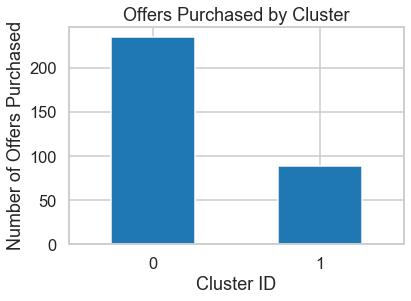

In [45]:
df_agg_merged.groupby(['n', 'cluster_id'])['n'].count().plot(kind='bar')
plt.xlabel('Cluster ID')
plt.xticks([0, 1], ('0', '1'), rotation=0)
plt.ylabel('Number of Offers Purchased')
plt.title('Offers Purchased by Cluster')
plt.show()

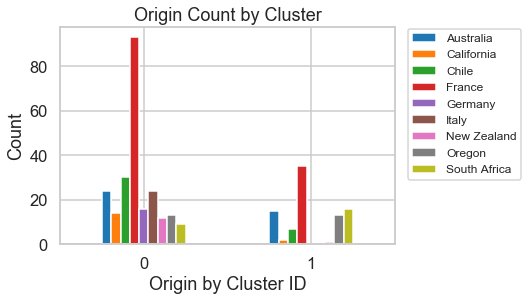

In [46]:
ax = pd.crosstab(df_agg_merged.cluster_id, df_agg_merged.origin).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Origin by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Origin Count by Cluster')
plt.show()

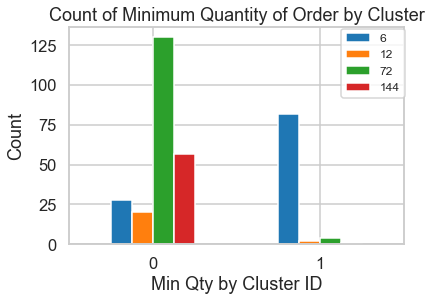

In [47]:
ax = pd.crosstab(df_agg_merged.cluster_id, df_agg_merged.min_qty).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Min Qty by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Minimum Quantity of Order by Cluster')
plt.show()

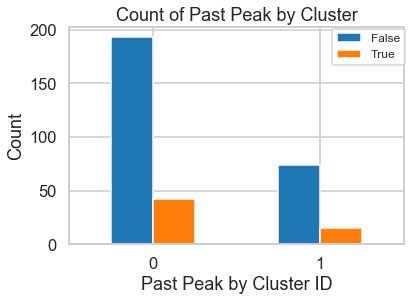

In [48]:
ax = pd.crosstab(df_agg_merged.cluster_id, df_agg_merged.past_peak).plot(kind='bar')
ax.legend(bbox_to_anchor=(1.02, 1.02), fontsize='large')
plt.xlabel('Past Peak by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Past Peak by Cluster')
plt.show()

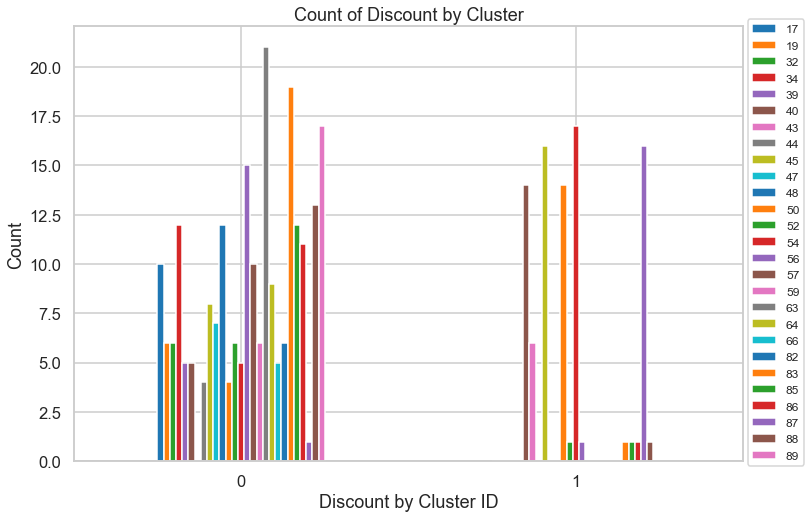

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
pd.crosstab(df_agg_merged.cluster_id, df_agg_merged.discount).plot(kind='bar', ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.03), fontsize='large')
plt.xlabel('Discount by Cluster ID')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Count of Discount by Cluster')
plt.show()

Agglomerative clustering separated 5 out of 9 varietals almost completely between clusters. There is a small overlap with Cabernet Sauvignon and Champagne. KMeans with K=3 did nearly as good separating these 5 varietals but had a bit more overlap.  

Agglomerative clustering appears to have combined the KMeans K=3 cluster 2 into cluster 0 to form its two clusters. Nearly. 

DBSCAN

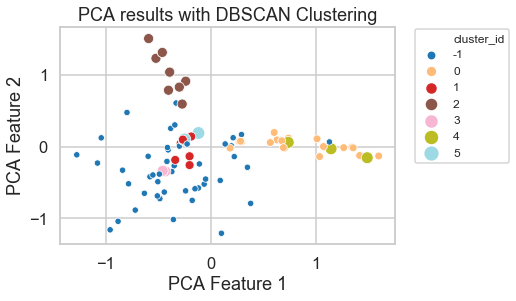

In [50]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.4, min_samples=2)
labels = dbscan.fit_predict(x_cols)
plot_pca_generic_clusters(labels, 'DBSCAN', pivot, x, y)

In [51]:
silhouette_avg = (silhouette_score(x_cols, labels))
print('Silhouette Score = ', silhouette_avg)

Silhouette Score =  0.025452229723455587


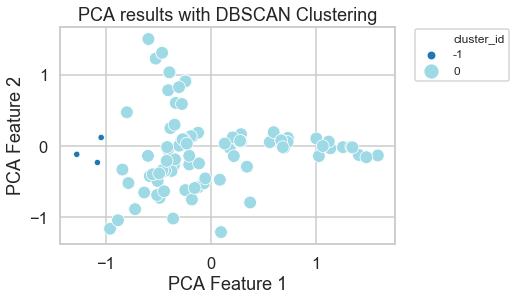

In [52]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(x_cols)
plot_pca_generic_clusters(labels, 'DBSCAN', pivot, x, y)

In [53]:
silhouette_avg = (silhouette_score(x_cols, labels))
print('Silhouette Score = ', silhouette_avg)

Silhouette Score =  0.2348896595208253


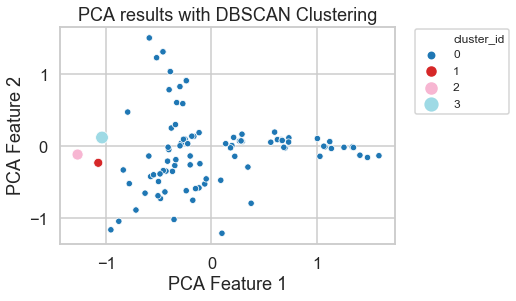

In [54]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=1)
labels = dbscan.fit_predict(x_cols)
plot_pca_generic_clusters(labels, 'DBSCAN', pivot, x, y)

In [55]:
silhouette_avg = (silhouette_score(x_cols, labels))
print('Silhouette Score = ', silhouette_avg)

Silhouette Score =  0.16468837239678863


DBSCAN has determined this is a noisy sample per its label of -1. I agree! The only way I can get it to classify all the data is to push it all into one cluster! Various combinations of eps and min_samples have resulted in either some data labeled as noise (with varying number of clusters) or all (or nearly all) data in one cluster.  

The parameter combinations that lead to the highest Silhouette Scores have mostly one cluster.   

DBSCAN is clearly not a good fit for this data as it either leaves data classified as noise or pushes all observations into one cluster. 

__How do their results compare? Which performs the best? Tell a story why you think it performs the best.__

__A:__ There is no clear winner among these clustering models as none have good Silhouette Scores or tight clusters with good separation in the PCA feature plots.  

While Affinity Propogation has one of the higher Silhouette Scores, it had a large number of clusters for a relatively small sample. This could be fine if it segmented the data well but plots of the original data features do not support that. There was also a lot of overlap on the PCA visualization plot.  

Spectral Clustering yielded fewer clusters than Affinity Propogation but still seemed to have a lot of overlap and clusters spread out over a large space based on the PCA feature plot. Its average Silhouette Score was lower than Affinity Propogation. 

While the Agglomerative Clustering seems to get good separation on the PCA feature plot, it does not seem to do a better job at segmenting features than the KMeans with K=3. It also has a lower Silhouette Score than Affinity Propogation and about equal to Spectral Clustering.  

DBSCAN has the highest Silhouette Score at .23, but that was with one large cluster and a little noise. This yields absolutely no segmentation of data at all. 

The KMeans model with K=3 seems best overall. It has the best balance of separation into distinct clusters and Silhouette Score. There is some discernable segmentation in the data among the three clusters.  

Among the four new models, Agglomerative Clustering seems best as it gets good cluster separation on the PCA plot and seems to do reasonably well at segmenting features in the original data. 
